# Penn Electric Racing Data Analyzer: PERDA

Welcome to PERDA: PER custom python library for data processing needs.

Instructions:
- This is a template notebook to demonstrate PERDA.
- PERDA can be installed locally, or on google colab.
- Having access to PERDA github repo will give you access to the library
- Please follow instructions for online OR local installation.


In [1]:
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import os

## Colab Instructions:

We use github repo to install the library. Simply run the following code to install perda:

In [ ]:
# Run this cell for perda updates, and potential branch changes
ORG_NAME = "Penn-Electric-Racing"
REPO_NAME = "PER-Data-Analyzer"
BRANCH = "main"  # Branch Input

!pip uninstall -y perda #Avoid perda overlap incase of updates
!pip install git+https://github.com/{ORG_NAME}/{REPO_NAME}.git@{BRANCH}

You can mount PER google drive and access data files if you have access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''path to folder --> Choose your path, personal or PER drive'''

#folder_path = '/content/drive/MyDrive/REV8/TESTING/REV8 Testing Data/'
folder_path = '/content/drive/Shareddrives/FSAE Penn Electric Racing/REV8/TESTING/REV8 Testing Data'

'''If using uploaded file, comment previous and uncomment next'''
#folder_path = 'relative/path/to/your/file'

In [ ]:
#run this cell if you need to see the available directories
os.listdir(folder_path)

In [ ]:
# Name of the log file
logfile = folder_path + "/10_08/01_01_00 12_18_59 AM.csv"
'''
if using personal drive
'''
#logfile = "/04_24/04_24_23 07_41_13 PM.csv"
'''
If using uploaded file, comment previous and uncomment next
'''
#logfile = folder_path

## Local Instructions

PERDA can also be installed locally. You will need to clone the git repo locally.

- Open terminal, `cd` to the folder you want to put repo
- Run `git clone https://github.com/Penn-Electric-Racing/PER-Data-Analyzer.git`
- Make sure your python env is activated, then run `pip install .`
- Set your path for logfile

In [2]:
# logfile = "path/to/your/csv/file"
logfile = "../Tests/csv files/[Practice Endurance] 05_25_23 09_39_05 PM.csv" #example

## Code Demo

Import perda and create instance. You can create multiple perda instence for reading multiple csv at the same time.

In [3]:
import perda

aly = perda.create() #creating analyser object
aly2 = perda.create()
aly3 = perda.create()

Analyzer Created
Analyzer Created
Analyzer Created


Perda parse all data base on timestamp of one high frequency data \
If no input, default to highest frequency data

In [4]:
aly.read_csv(logfile) # Reading the csv file using raw timestamp
# aly2.read_csv(logfile, input_align_name = "max_freq") # Reading csv aligning with max freq variable (Don't want to do this usually)
# aly3.read_csv(logfile, input_align_name = "sdl.currentTime") # Reading csv with known align variable. Do this if such variable exists and you know which one it is.


Reset Analyzer
Reading file: PER CSV Modbus Log 05/25/23 09:39:05 PM



Processing CSV: 17791117lines [00:26, 667086.03lines/s] 

Csv parsing complete.


In [5]:
# Print all possible input can variables. Good for copying down in text editor and find your stuff :)
aly.print_input_can_variables()

Can Variables                                    Info
------------------------------------------------------
ams.airsState                                    AirsState
ams.board.glvTemp                                GLV Board Temperature
ams.board.hvTemp                                 HV Board Temperature
ams.cellCount                                    Cell Count
ams.charging.commandI                            Current Command
ams.charging.commandV                            Voltage Command
ams.chipCount                                    Chip Count
ams.connections.chargerCanConnected              Charger Connected over CAN
ams.connections.dashCanConnected                 Dashboard Connected over CAN
ams.connections.pcmCanConnected                  Powertrain Control Module Connected over CAN
ams.connections.pduCanConnected                  Power Distribution Unit Connected over CAN
ams.connections.sdlCanConnected                  Telemetry Connected over CAN
ams.error              

In [6]:
# Data summary with given variable name
variables = ["pcm.wheelSpeeds.frontRight"
]

aly.analyze_data(variables)
# aly.analyze_data(variables, start_time=500, end_time=600, time_unit="s")
# aly.analyze_data(variables, start_time=0, end_time=1, time_unit="s")

Statistics for **pcm.wheelSpeeds.frontRight**
Can ID: 8393
Data amount: 21862
Start: 0.000s | End: 2,186.174s | Duration: 2,186.174s
Max Value: 49.28375 (544.990s)
Min Value: 0.0 (0.000s)
Average: 22.407688079376957
Integral: 48987.10507924384




Graph variables \
Always shows HV changes:\
Red: HV turn on \
Green: HV turn off


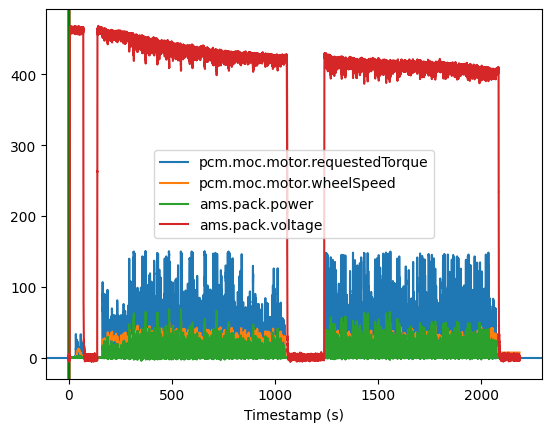

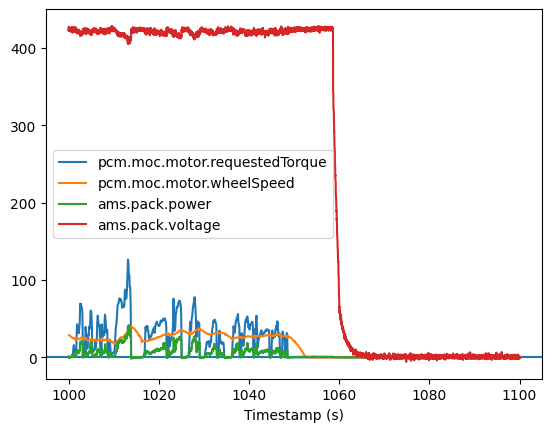

In [7]:
# Variables to graph
variables = [
    "pcm.moc.motor.requestedTorque",
    "pcm.moc.motor.wheelSpeed",
    "ams.pack.power",
    "ams.pack.voltage"
]
plt.axhline(y=0)
aly.plot(variables)

plt.axhline(y=0)
aly.plot(variables,  start_time = 1000, end_time = 1100, time_unit = "s")

Dual graph: Plot two different variables, and scale them differently for better visulization\
Variables comes in pair

graph for pcm.moc.motor.requestedTorque and pcm.moc.motor.wheelSpeed


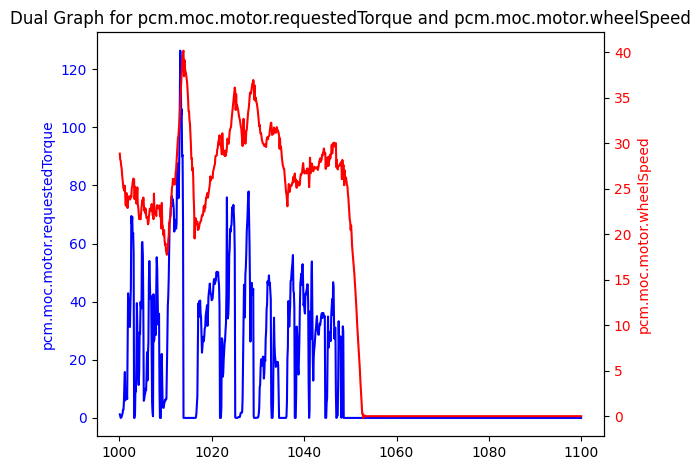




graph for ams.pack.power and ams.pack.voltage


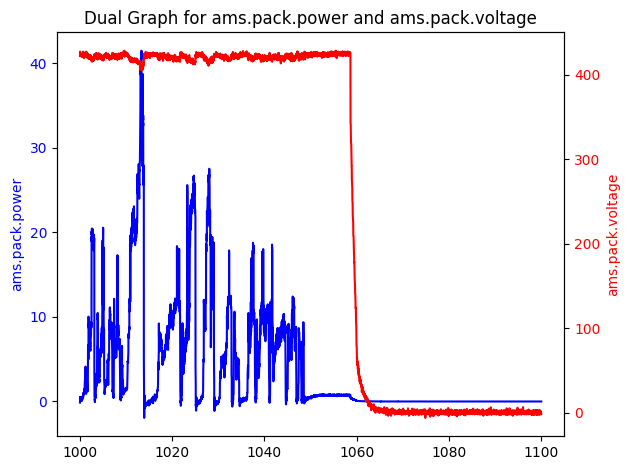

In [8]:
# Dual graph with different scale. Two variables per pair
variables = [
    "pcm.moc.motor.requestedTorque",
    "pcm.moc.motor.wheelSpeed",
    "ams.pack.power",
    "ams.pack.voltage"
]
aly.plot_dual(variables,  start_time = 1000, end_time = 1100, time_unit = "s")

Align input arrays, fill missing data with three different methods:\
connect\
extend_forward\
extend_backward

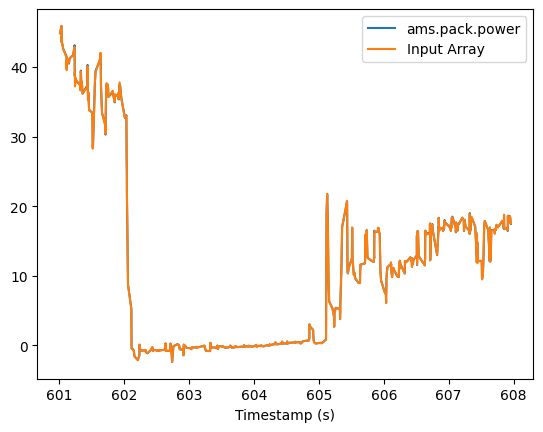

In [9]:
# Align variables for timestamp match

v_al = [
    "ams.pack.voltage",
    "ams.pack.current"
]

# match_type choices: connect, extend_forward, extend_backward
alist = aly.align_array(v_al, match_type="connect")
# alist[0] is aligned voltage; alist[1] is aligned current

# Helper to multiply two nparray for later plotting

product_second_col = alist[0][:, 1] * alist[1][:, 1] /1000 # Multiply every data to get power and correct unit
combined_array = np.column_stack((
    alist[0][:, 0],       # First column (shared)
    product_second_col,  # New second column (product)
    alist[0][:, 2],       # Third column (shared)
    alist[0][:, 3]        # Fourth column (shared)
))

# Compare to power sensor
variables = [
    "ams.pack.power",
    combined_array,
    ]
aly.plot(variables, start_time = 601, end_time = 608, time_unit = "s")

Built-in array calculation method

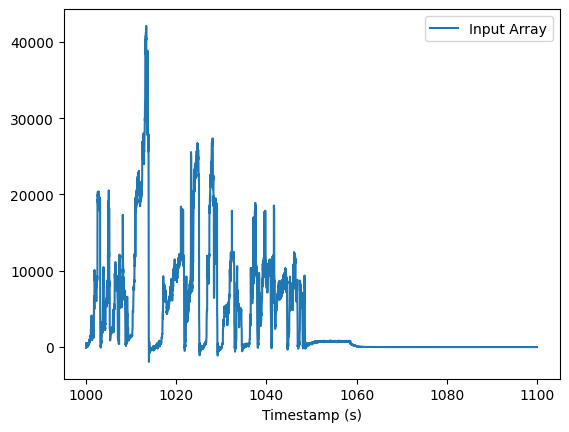

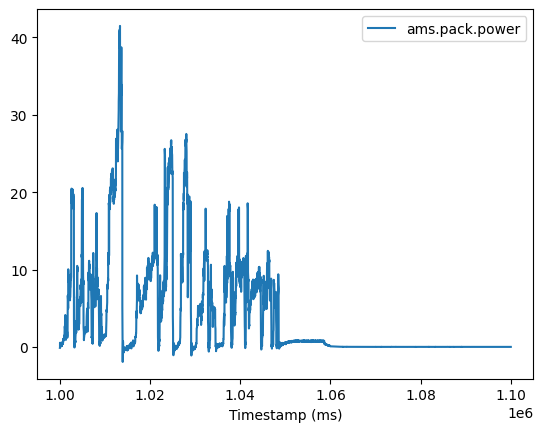

In [10]:
# Internel operation graph function
# Set the variable and the operations between them
v_op = [
    "ams.pack.voltage",
    "*",
    "ams.pack.current"
]

power = aly.get_compute_arrays(v_op, match_type="connect")

variables = [power]
aly.plot(variables, start_time = 1000, end_time = 1100, time_unit = "s")

variables = ["ams.pack.power"]
# Change time_unit to ms
aly.plot(variables, start_time = 1000000, end_time = 1100000, time_unit = "ms")

FFT for data smoothing (Advanced)

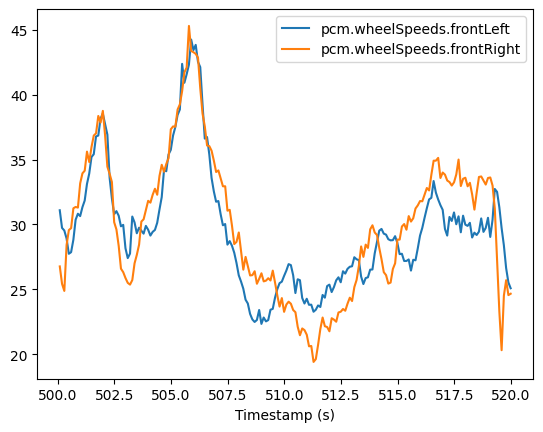

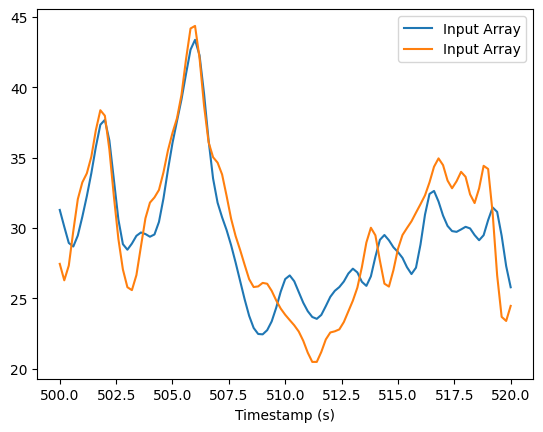

In [11]:
variables = [
    "pcm.wheelSpeeds.frontLeft",
    "pcm.wheelSpeeds.frontRight"
]

aly.plot(variables, start_time = 500, end_time = 520)

fft_arr = aly.get_band_filter(variables, sample_frequency=5, filtered_lower_band=1)
aly.plot(fft_arr, start_time = 500, end_time = 520)